In [1]:
#Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Reading the csv files
pub_assist = pd.read_csv("Public assist.csv")

In [3]:
#Displaying the first few rows to understand the data structure
pub_assist.head()

,Neighborhood,Id,Estimate public assist; Total:,Margin of Error public assist; Total:,Estimate; Total: - With public assistance income,With public assistance income percentage,Estimate; Total: - No public assistance income,No public assistance income percentage
0,Allegheny Center,1,870,93.000000,20,2.298851,850,97.701149
1,Allegheny West,2,146,36.000000,9,6.164384,137,93.835616
2,Allentown,3,1069,132.457540,141,13.189897,928,86.810103
3,Arlington,4,701,104.465305,26,3.708987,675,96.291013
4,Arlington Heights,5,144,59.000000,8,5.555556,136,94.444444


In [4]:
#These are the column titles
print(pub_assist.columns)

Index(['Neighborhood', 'Id', 'Estimate public assist; Total:',
       'Margin of Error public assist; Total:',
       'Estimate; Total: - With public assistance income',
       'With public assistance income percentage',
       'Estimate; Total: - No public assistance income',
       'No public assistance income percentage'],
      dtype='object')


In [5]:
columns_to_drop = [
'Estimate; Total: - With public assistance income',
       'Estimate; Total: - No public assistance income',
]
pub_assist1 = pub_assist.drop(columns=columns_to_drop)

In [6]:
%store pub_assist1

Stored 'pub_assist1' (DataFrame)


In [7]:
#The data types of each column
print(pub_assist1.dtypes)

Neighborhood                                 object
Id                                            int64
Estimate public assist; Total:                int64
Margin of Error public assist; Total:       float64
With public assistance income percentage    float64
No public assistance income percentage      float64
dtype: object


In [8]:
#Getting a description of the data
pub_assist1.describe()

,Id,Estimate public assist; Total:,Margin of Error public assist; Total:,With public assistance income percentage,No public assistance income percentage
count,91.00000,91.000000,91.000000,91.000000,91.000000
mean,46.00000,1471.791209,130.292002,5.971539,94.028461
std,26.41338,1451.294101,76.774451,5.863292,5.863292
min,1.00000,3.000000,3.000000,0.000000,75.294118
25%,23.50000,513.500000,65.905592,1.626147,91.722125
50%,46.00000,1082.000000,125.207827,3.494624,96.505376
75%,68.50000,1886.500000,168.540225,8.277875,98.373853
max,91.00000,7484.000000,360.919659,24.705882,100.000000


<Figure size 1500x800 with 0 Axes>

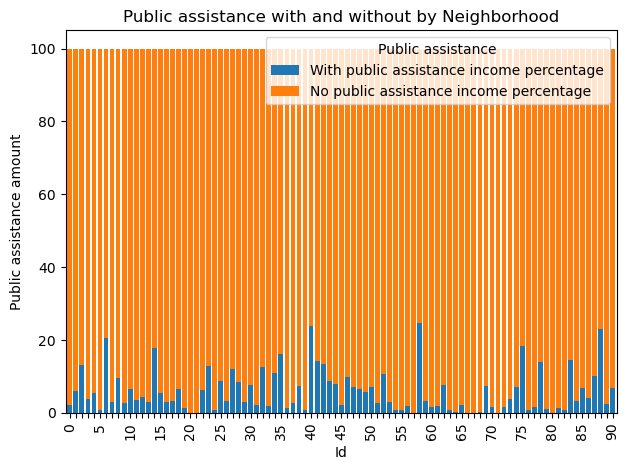

In [9]:
#Plotting a combined bar graph
pa_columns = ['With public assistance income percentage', 'No public assistance income percentage']
plt.figure(figsize=(15, 8))
ax = pub_assist1[pa_columns].plot(kind='bar', stacked=True, width=0.8)
plt.xlabel('Id')
plt.ylabel('Public assistance amount')
plt.title('Public assistance with and without by Neighborhood')
plt.legend(title='Public assistance')

# Rotate and display every 5th label
for i, label in enumerate(ax.get_xticklabels()):
    if i % 5 != 0:
        label.set_visible(False)

plt.tight_layout()
plt.show()

/var/folders/b8/j_gf4x196c1ch2_p5wh4jzj40000gn/T/ipykernel_61569/2477913971.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Neighborhood', y='Estimate public assist; Total:', data=pub_assist1, ci=None)


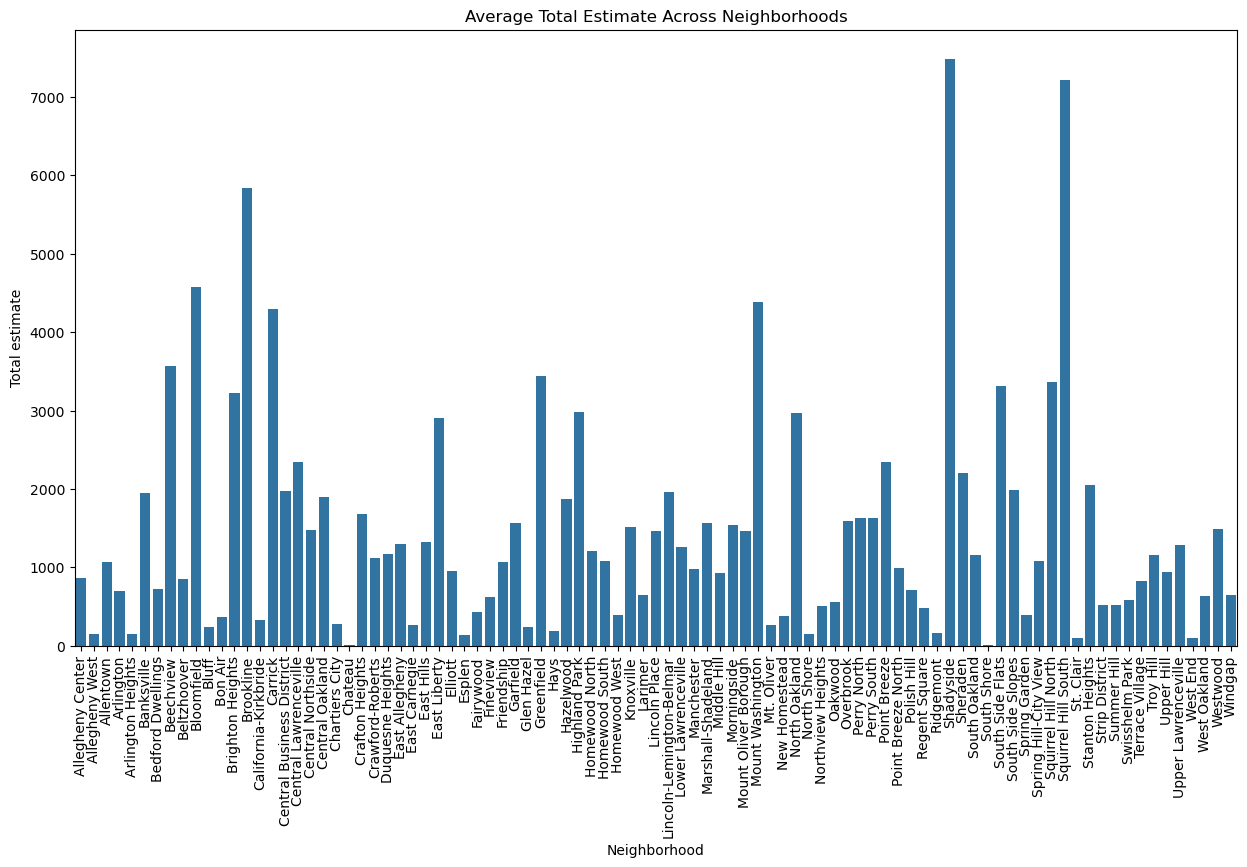

In [10]:
#Plotting a bar graph
plt.figure(figsize=(15, 8))
sns.barplot(x='Neighborhood', y='Estimate public assist; Total:', data=pub_assist1, ci=None)
plt.xlabel('Neighborhood')
plt.ylabel('Total estimate')
plt.title('Average Total Estimate Across Neighborhoods')
plt.xticks(rotation=90)
plt.show()

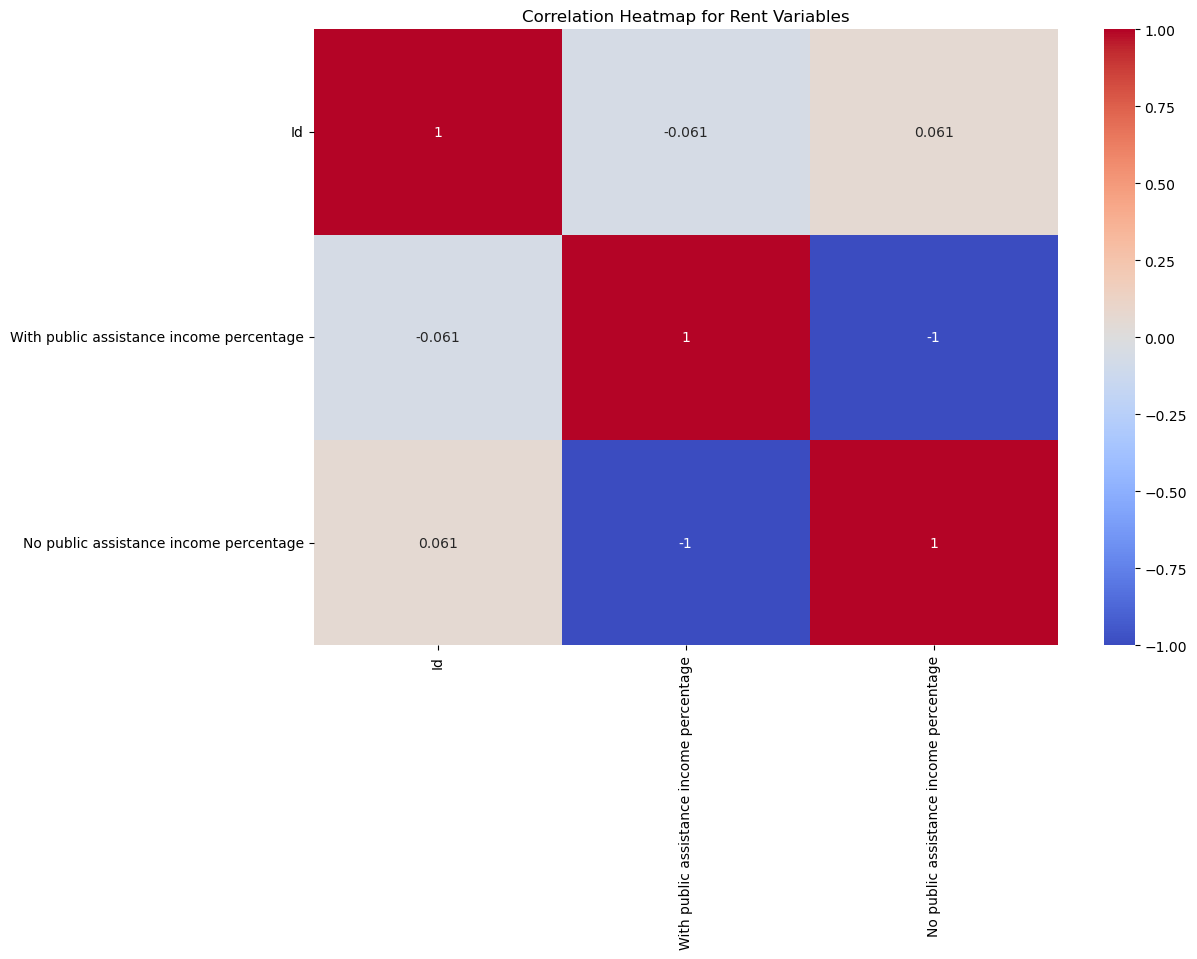

In [11]:
#Plotting a correlation matrix
correlation_matrix = pub_assist1[['Id', 'With public assistance income percentage', 'No public assistance income percentage']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Rent Variables')
plt.show()

In [12]:
#Checking the number of missing values in each columns
missing_values = pub_assist1.isnull().sum()
print(missing_values)

Neighborhood                                0
Id                                          0
Estimate public assist; Total:              0
Margin of Error public assist; Total:       0
With public assistance income percentage    0
No public assistance income percentage      0
dtype: int64


In [13]:
#Performing one hot encoding, feature engineering for neighborhood columns
one_hot_encoded = pd.get_dummies(pub_assist1['Neighborhood'], prefix='neighborhood')
pub_assist2 = pd.concat([pub_assist1, one_hot_encoded], axis=1)

In [14]:
pub_assist2.head()

,Neighborhood,Id,Estimate public assist; Total:,Margin of Error public assist; Total:,With public assistance income percentage,No public assistance income percentage,neighborhood_Allegheny Center,neighborhood_Allegheny West,neighborhood_Allentown,neighborhood_Arlington,...,neighborhood_Summer Hill,neighborhood_Swisshelm Park,neighborhood_Terrace Village,neighborhood_Troy Hill,neighborhood_Upper Hill,neighborhood_Upper Lawrenceville,neighborhood_West End,neighborhood_West Oakland,neighborhood_Westwood,neighborhood_Windgap
0,Allegheny Center,1,870,93.000000,2.298851,97.701149,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Allegheny West,2,146,36.000000,6.164384,93.835616,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Allentown,3,1069,132.457540,13.189897,86.810103,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Arlington,4,701,104.465305,3.708987,96.291013,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,Arlington Heights,5,144,59.000000,5.555556,94.444444,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
